# Simple Exploratory Data Analysis [EDA]

**replacing the missing values by:**
* mean,
* mode
* knn
* drop
* custom expertise

## importing libraries

In [127]:
import pandas as pd

In [128]:
data = pd.read_csv("D:/msn/Datasets/ML_Dataset/data1/Travel.csv")

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [130]:
## checking is there any null:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [131]:
## checking is there any duplicate
data.duplicated().sum()

0

In [132]:
## segregating the data into numerical and categories:
# Initialize an empty list to store numeric column names
num_col = []
cate_col = []
# Iterate through columns and check if they are numeric
for i in data.columns:
    if pd.api.types.is_numeric_dtype(data[i]):
        num_col.append(i)
    else:
        cate_col.append(i)

# Create a new DataFrame containing only numeric columns
data_num = data[num_col]
data_cate = data[cate_col]


In [133]:
data_num.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
CityTier                      0
DurationOfPitch             251
NumberOfPersonVisiting        0
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

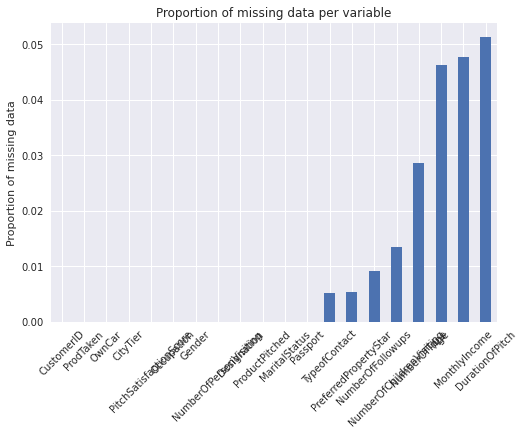

In [135]:
with plt.style.context("seaborn"):
    data.isnull().mean().sort_values(ascending=True).plot.bar(rot=45)
    plt.ylabel("Proportion of missing data")
    plt.title("Proportion of missing data per variable");

In [134]:
data_cate

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive
...,...,...,...,...,...,...
4883,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager
4884,Company Invited,Salaried,Male,Basic,Single,Executive
4885,Self Enquiry,Salaried,Female,Standard,Married,Senior Manager
4886,Self Enquiry,Small Business,Male,Basic,Single,Executive


In [72]:
data_cate.isnull().sum()

TypeofContact     25
Occupation         0
Gender             0
ProductPitched     0
MaritalStatus      0
Designation        0
dtype: int64

In [73]:
data_num.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
CityTier                      0
DurationOfPitch             251
NumberOfPersonVisiting        0
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

# 1. USING MEAN MEDIAN MODE

In [74]:
def update_missing_values(df):
    for i in df:
        if df[i].isnull().sum()!=0:
            if df[i].dtype =='O':
                col_mode= df[i].mode().iloc[0]
                df[i] = df[i].fillna(col_mode)
                
            elif pd.api.types.is_numeric_dtype(df[i]):
                col_mean= df[i].mean()
                df[i] = df[i].fillna(col_mean)
        else:
            pass
                

In [75]:
## filling missing values in data_num:
update_missing_values(data_num)

C:\Users\Engin\AppData\Local\Temp\ipykernel_12880\4285807927.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(col_mean)


In [76]:
data_num.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
CityTier                    0
DurationOfPitch             0
NumberOfPersonVisiting      0
NumberOfFollowups           0
PreferredPropertyStar       0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
MonthlyIncome               0
dtype: int64

In [77]:
update_missing_values(data_cate);

C:\Users\Engin\AppData\Local\Temp\ipykernel_12880\4285807927.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(col_mode)


In [78]:
data_cate.isnull().sum()

TypeofContact     0
Occupation        0
Gender            0
ProductPitched    0
MaritalStatus     0
Designation       0
dtype: int64

In [79]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [80]:
def updating_main_table(up_df,custom_df):
    for i in up_df.columns:
        if up_df[i].isnull().sum()!=0:
            for j in custom_df.columns:
                if i==j:
                    up_df[i]=custom_df[j].copy()
                else:
                    pass
        else:
            pass

In [81]:
updating_main_table(data,data_num)
updating_main_table(data,data_cate)

for i in data.columns:   
    if data[i].isnull().sum()!=0:
        for j in data_num.columns:
            if i==j:
                data[i]=data_num[j].copy()
                
            

In [82]:
data.duplicated().sum()

0

In [83]:
data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [84]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.000000,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.000000,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.000000,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.000000,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


# 2.  Another method for missing values are Knn IMPUTER


In [96]:
data_num

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,200004,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,204884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,204885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,204886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [97]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed_df= imputer.fit_transform(data_num)

imputed_df = pd.DataFrame(imputed_df, columns=data_num.columns)

In [98]:
imputed_df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
CityTier                    0
DurationOfPitch             0
NumberOfPersonVisiting      0
NumberOfFollowups           0
PreferredPropertyStar       0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
MonthlyIncome               0
dtype: int64

## Knn cannot impute categorical so we will use mode technique for categorical missing value 

# 3. interpolation technique

In [99]:
data_num.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,200004,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0


In [100]:
data_num.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
CityTier                      0
DurationOfPitch             251
NumberOfPersonVisiting        0
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

In [103]:
data_num['Age']=data_num['Age'].interpolate(method='linear')


C:\Users\Engin\AppData\Local\Temp\ipykernel_12880\3345453293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['Age']=data_num['Age'].interpolate(method='linear')


In [111]:
for i in data_num.columns:
    data_num[i]=data_num[i].interpolate(method='linear');
    
    

C:\Users\Engin\AppData\Local\Temp\ipykernel_12880\3552706528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num[i]=data_num[i].interpolate(method='linear');


In [112]:
data_num

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,200004,0,32.5,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,204884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,204885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,204886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [113]:
data_num.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
CityTier                    0
DurationOfPitch             0
NumberOfPersonVisiting      0
NumberOfFollowups           0
PreferredPropertyStar       0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
MonthlyIncome               0
dtype: int64

---
---

In [104]:
data_num['Age'].isnull().sum()

0

In [105]:
data_num['Age'].mean()

37.62520458265139

In [106]:
data['Age'].mean()

37.62226512226512

In [108]:
imputed_df['Age'].mean()

37.55441898527007

# Exploring the categorical data:

## Loading data from pandas

In [114]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [136]:
data_cate

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive
...,...,...,...,...,...,...
4883,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager
4884,Company Invited,Salaried,Male,Basic,Single,Executive
4885,Self Enquiry,Salaried,Female,Standard,Married,Senior Manager
4886,Self Enquiry,Small Business,Male,Basic,Single,Executive


In [137]:
data_cate.count()

TypeofContact     4863
Occupation        4888
Gender            4888
ProductPitched    4888
MaritalStatus     4888
Designation       4888
dtype: int64

In [138]:
data_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TypeofContact   4863 non-null   object
 1   Occupation      4888 non-null   object
 2   Gender          4888 non-null   object
 3   ProductPitched  4888 non-null   object
 4   MaritalStatus   4888 non-null   object
 5   Designation     4888 non-null   object
dtypes: object(6)
memory usage: 229.2+ KB


## checking total null values in dataset

In [140]:
data_cate.isnull().sum()

TypeofContact     25
Occupation         0
Gender             0
ProductPitched     0
MaritalStatus      0
Designation        0
dtype: int64

**Find the proportion of missing values per variable**

**sort them in ascending order, and then make a bar plot**

**rotating the ticks on the xaxis and adding a title and the y-axis label:with plt.style.context("seaborn"):**

In [141]:
data_cate.isnull().mean().sort_values(ascending=True)

Occupation        0.000000
Gender            0.000000
ProductPitched    0.000000
MaritalStatus     0.000000
Designation       0.000000
TypeofContact     0.005115
dtype: float64

## Selecting only numerical columns where values are null

In [123]:
numerical_columns = data.select_dtypes(include=['number'])

# Counting null values in the numerical columns
null_counts_numerical = numerical_columns.isnull().sum()

print(null_counts_numerical)

CustomerID                    0
ProdTaken                     0
Age                         226
CityTier                      0
DurationOfPitch             251
NumberOfPersonVisiting        0
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64


### Observation regarding null values:
* we have total 8 columns having null values 
* 7 are numerical while one with categorical


### lets iterate over the column and check for null and the numeric with mean and categorical with mode

In [160]:
for i in data_cate.columns:
    if data_cate[i].isnull().sum()!=0:
        col_mode= data_cate[i].mode().loc[0]
        data_cate[i]=data_cate[i].fillna(col_mode)
    else:
        pass


C:\Users\Engin\AppData\Local\Temp\ipykernel_12880\1276257384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cate[i]=data_cate[i].fillna(col_mode)


In [161]:
# checking for null
data_cate.isnull().sum()

TypeofContact     0
Occupation        0
Gender            0
ProductPitched    0
MaritalStatus     0
Designation       0
dtype: int64

In [162]:
data_cate

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive
...,...,...,...,...,...,...
4883,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager
4884,Company Invited,Salaried,Male,Basic,Single,Executive
4885,Self Enquiry,Salaried,Female,Standard,Married,Senior Manager
4886,Self Enquiry,Small Business,Male,Basic,Single,Executive


In [171]:
for i in data_cate.columns:
    unq=data_cate[i].unique()
    print(f"{i} : {unq}")

TypeofContact : ['Self Enquiry' 'Company Invited']
Occupation : ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender : ['Female' 'Male' 'Fe Male']
ProductPitched : ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
MaritalStatus : ['Single' 'Divorced' 'Married' 'Unmarried']
Designation : ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


In [181]:
import matplotlib.pyplot as plt
import seaborn as sns


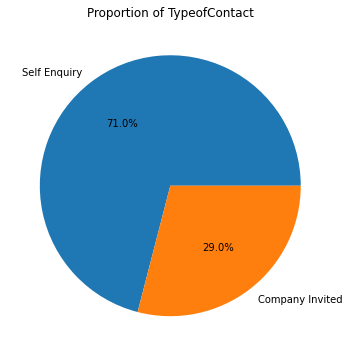

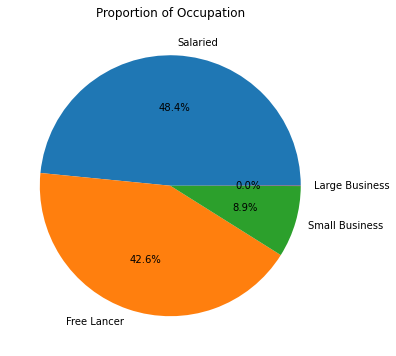

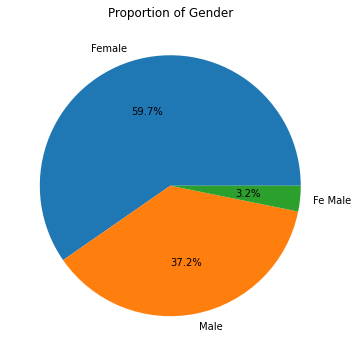

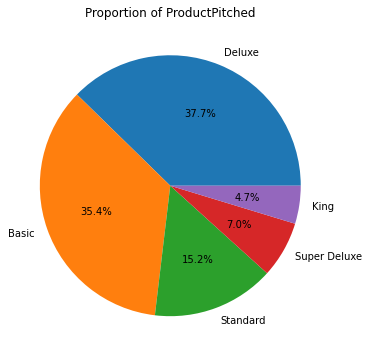

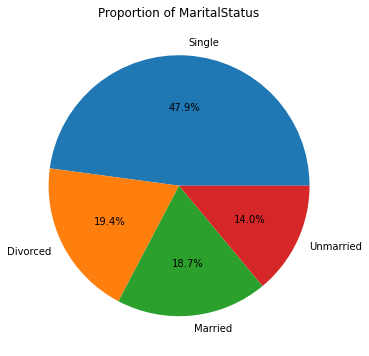

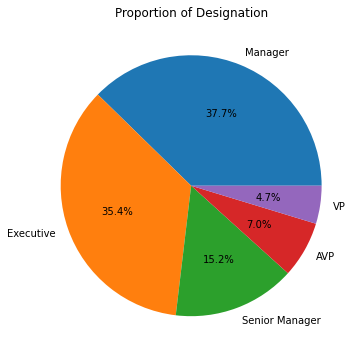

In [182]:
for i in data_cate.columns:
    plt.figure(figsize=(6, 6))
    plt.pie(data_cate[i].value_counts(), labels=data_cate[i].unique(), autopct='%1.1f%%')
    plt.title(f'Proportion of {i}')
    plt.show()


#### so the observation shows that deignation is not that imp so,we can drop it meanwhile in gender proportion their is error we need to rectify

In [188]:
(data_cate['Gender']=='Fe Male').sum()

155

In [192]:
data_cate['Gender'] = data_cate['Gender'].replace('Fe Male', 'Female')

data_cate = data_cate.drop('Designation', axis=1)

C:\Users\Engin\AppData\Local\Temp\ipykernel_12880\3601700532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cate['Gender'] = data_cate['Gender'].replace('Fe Male', 'Female')


In [193]:
(data_cate['Gender']=='Fe Male').sum()

0

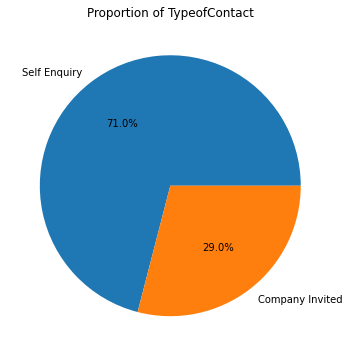

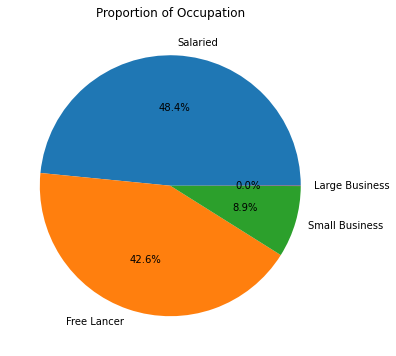

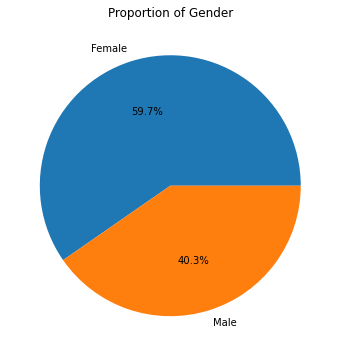

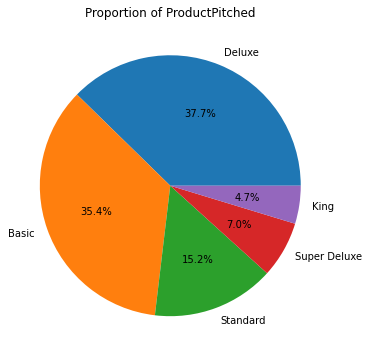

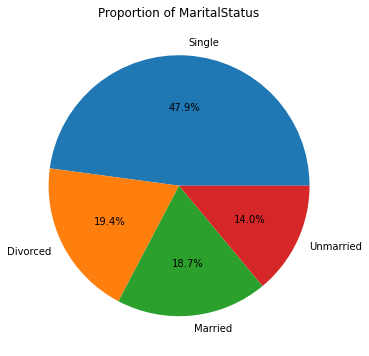

In [194]:
for i in data_cate.columns:
    plt.figure(figsize=(6, 6))
    plt.pie(data_cate[i].value_counts(), labels=data_cate[i].unique(), autopct='%1.1f%%')
    plt.title(f'Proportion of {i}')
    plt.show()


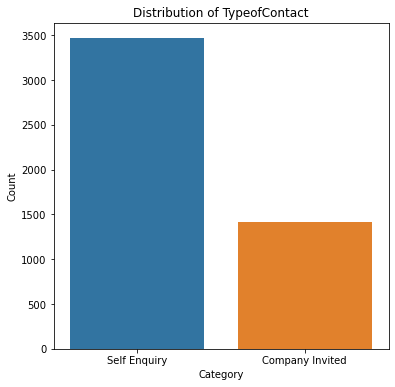

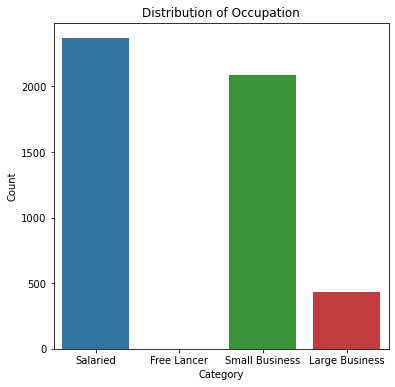

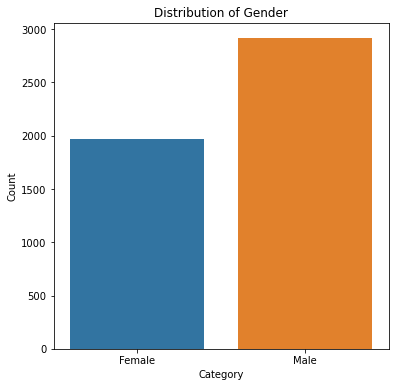

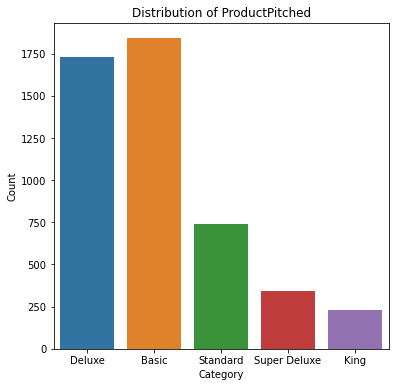

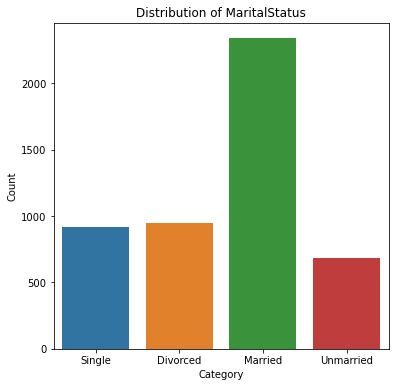

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a stacked bar chart of two categorical variables
for i in data_cate.columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(data=data_cate, x=f"{i}")
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title(f'Distribution of {i}')
    plt.show()
